# <div style='padding:25px;background-color:maroon;color:white;border-radius:4px;font-size:100%;text-align: center'>Banking Data Analysis<br></div>

## <span style="color:Aqua;">Importing libraries from Python</span>

In [1]:
import pandas as pd
pd.options.display.max_columns = 50
pd.set_option("display.precision", 4)
pd.set_option('display.float_format', '{:.4f}'.format)

import numpy as np

import seaborn as sns
sns.set_theme(context='notebook', style='white', palette='dark', font='sans-serif', font_scale=1, color_codes=True, rc=None)
sns.set_style({'axes.facecolor': 'white','axes.edgecolor': 'white'})

import matplotlib.pyplot as plt
plt.rcParams.update({
    'text.color': 'black',  # Change font color
    'axes.labelcolor': 'black',  # Change axis label color
    'xtick.color': 'black',  # Change x-tick color
    'ytick.color': 'black',  # Change y-tick color
    'font.weight': 'bold',  # Change font weight
    'axes.titleweight': 'bold',  # Change title weight
    'axes.labelweight': 'bold',# Change label weight
})


from sklearn.preprocessing import StandardScaler, RobustScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans, DBSCAN
from kneed import KneeLocator
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

import pickle



## <span style="color:Aqua;">Reading model dataset:</span>

In [2]:
df = pd.read_feather('model_ready.feather')

In [4]:
df.sample(3)

num_bank_accounts  num_credit_card  num_of_loan  delay_from_due_date  \
94249                 10                6            6                   51   
22144                  5                6            2                    9   
88615                 10                5            5                   31   

       num_of_delayed_payment  num_credit_inquiries  credit_mix  \
94249                      20               11.0000           0   
22144                       4                2.0000           2   
88615                      19               14.0000           0   

       payment_of_min_amount  credit_score  credit_inquiry_per_loan  \
94249                      2             1                   2.0000   
22144                      0             1                   1.0000   
88615                      2             1                   3.0000   

       age_group  disposable_income  age_boxcox  annual_income_boxcox  \
94249          0          1358.9838      6.2613               12.7252   
22144          2          3107.8029     10.2246               13.7946   
88615          2           862.6173     11.1894               11.6611   

       monthly_inhand_salary_boxcox  interest_rate_boxcox  \
94249                       10.0070                7.1958   
22144                       11.5570                2.4772   
88615                        9.1914                5.7674   

       outstanding_debt_square  credit_utilization_ratio_log  \
94249                  43.2790                        3.7136   
22144                  13.9667                        3.5264   
88615                  52.3768                        3.6636   

       credit_history_age_boxcox  changed_credit_limit_cube  \
94249                    42.5489                          0   
22144                   207.7880                         64   
88615                    23.0469                         69   

       total_emi_per_month_square  amount_invested_monthly_boxcox  \
94249                      7.0277                          6.0047   
22144                      7.8230                          6.7693   
88615                      5.9387                          6.0756   

       monthly_balance_boxcox  credit_limit_change_rate_exp  \
94249                 19.0902                        0.6557   
22144                 20.5230                        0.3997   
88615                 18.6159                        0.8369   

       debt_income_ratio_log  loan_income_ratio_month_boxcox  \
94249                 7.3023                          1.8024   
22144                 8.3155                          1.9354   
88615                 6.8059                          1.7713   

       credit_utilization_per_account_boxcox  reliable_payment_boxcox  \
94249                                 0.8314                   5.0208   
22144                                 0.9633                   0.0228   
88615                                 0.8127                   6.0743   

       delayed_payment_ratio_boxcox  investment_to_income_ratio_square  \
94249                        1.2337                             0.1410   
22144                        0.3004                             0.1065   
88615                        1.3767                             0.1787   

       total_credit_exposure_boxcox  \
94249                       30.1307   
22144                       14.0921   
88615                       34.2137   

       credit_utilization_to_income_ratio_boxcox  savings_rate_rec  \
94249                                    -7.8815           50.2479   
22144                                    -9.2659           88.1328   
88615                                    -6.9170           31.2763   

       income_stability_boxcox  total_liability_boxcox  debt_paytime_log  \
94249                  -0.1236                 30.1904            3.6156   
22144                   0.0339                 14.7076            1.1430   
88615                   0.0846               

## <span style="color:Aqua;">Selecting Features:</span>

### <span style="color:Khaki;">Problem Statement for Customer Segmentation (Clustering):
<span style="color: Chartreuse;">   &#9784; &nbsp;</span> Utilize clustering algorithms to group customers based on their banking behaviors, transaction histories, and demographics. <br>
- Apply clustering algorithms to group policyholders based on similar characteristics and behavior.
- Identify customer segments with common insurance needs and preferences.
- Tailor marketing strategies and product offerings to specific clusters, enhancing customer
engagement and increasing cross-selling opportunities.

### <span style="color:Khaki;">Features for Banking behaviors and transaction histories:

In [9]:
features = ['num_bank_accounts', 'num_credit_card', 'num_of_loan', 'delay_from_due_date',
    'num_of_delayed_payment', 'num_credit_inquiries', 'credit_mix',
    'payment_of_min_amount', 'payment_behaviour', 'credit_score',
    'reliable_payment_boxcox', 'delayed_payment_ratio_boxcox', 
     'total_credit_exposure_boxcox','credit_utilization_to_income_ratio_boxcox', 'savings_rate_rec',
      'debt_paytime_log','interest_rate_boxcox'
]

### <span style="color:Khaki;">Features for Demographics and financial status:

In [10]:
features1 = ['age_boxcox','total_emi_per_month_square','amount_invested_monthly_boxcox','annual_income_boxcox',
             'income_stability_boxcox','total_liability_boxcox','investment_to_income_ratio_square',
             'credit_limit_change_rate_boxcox','outstanding_debt_square']

### <span style="color:Khaki;">Selecting features for modeling:

Selecting features basedon the characteristics. Removing few features may the quality of clustering.

In [11]:
original_features=['num_bank_accounts', 'num_credit_card', 'num_of_loan', 'delay_from_due_date','num_of_delayed_payment',
     'num_credit_inquiries', 'credit_mix','payment_of_min_amount',  'credit_score','age_boxcox',
     'total_emi_per_month_square','amount_invested_monthly_boxcox','annual_income_boxcox',]

all_features = ['num_bank_accounts', 'num_credit_card', 'num_of_loan', 'delay_from_due_date',
    'num_of_delayed_payment', 'num_credit_inquiries', 'credit_mix','payment_of_min_amount', 
    'credit_score','reliable_payment_boxcox', 'delayed_payment_ratio_boxcox','total_credit_exposure_boxcox',
    'credit_utilization_to_income_ratio_boxcox', 'savings_rate_rec','debt_paytime_log','interest_rate_boxcox',
    'age_boxcox','total_emi_per_month_square','amount_invested_monthly_boxcox','annual_income_boxcox',
             'income_stability_boxcox','total_liability_boxcox','investment_to_income_ratio_square',
             'outstanding_debt_square','credit_inquiry_per_loan','changed_credit_limit_cube']

revised_features = ['num_bank_accounts','num_credit_card','num_of_loan','num_of_delayed_payment', 'delay_from_due_date',
                    'num_credit_inquiries', 'credit_mix','payment_of_min_amount', 
                    'credit_score','age_boxcox','total_emi_per_month_square','amount_invested_monthly_boxcox',
                    'annual_income_boxcox','total_liability_boxcox','outstanding_debt_square','savings_rate_rec']

# <span style="color:Tomato;">Training the model without scaling the dataset:</span>

#### <span style="color:Aqua;">I am going to use KMeans clustering for our problem. Hiearchical Clustering is not useful since we have more data point and variety of date.</span>

## <span style="color:Aqua;">Evaluation Metrics Interpretation:</span>

<span style="color:Khaki;"> Interpretation of silhouette scores:

- 1 to 0: Poor clustering, with many points assigned to the wrong clusters.
- 0 to 0.25: Weak structure, which might indicate overlapping clusters.
- 0.25 to 0.50: Reasonable clustering.
- 0.50 to 0.75: Good clustering.
- 0.75 to 1: Strong clustering, indicating well-defined clusters.

<span style="color:Khaki;"> Interpretation of Calinski-Harabasz Index: </span>

- Higher is better.
- Measures the ratio of the sum of between-cluster dispersion and within-cluster dispersion.

<span style="color:Khaki;"> Interpretation of Davies-Bouldin Index: </span>

- Range: 0 to ∞
-  Lower values indicate better clustering.
- Measures the average similarity ratio of each cluster with its most similar cluster.

## <span style="color:Aqua;">Training the model with all relevant Features:</span>

### <span style="color:Khaki;">Finding K value using Elbow method:

In [12]:
wcss = []

for k in range(1,6):
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(df[all_features])
    wcss.append(kmeans.inertia_)

print(wcss)

[512583104.386517, 289841972.35462594, 234404438.4326222, 194331093.46174228, 171812046.58314496]


#### <span style="color:Khaki;">Plotting Within-Cluster Sum of Squares (WCSS) values to find the Elbow:

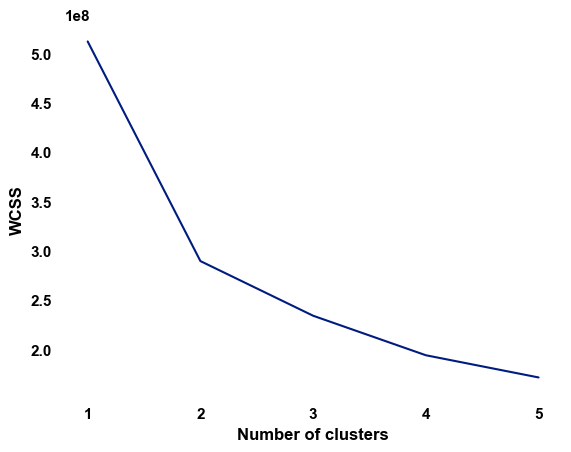

In [14]:
plt.plot(range(1,6),wcss)
plt.xticks(range(1,6))
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

<span style="color:DodgerBlue;">From the above plot we can see that the Knee is located near the value 2

#### <span style="color:Khaki;">Finding knee locator in the Elbow curve using KneeLocator class:

In [15]:
kl = KneeLocator(range(1,6),wcss,curve='convex',direction="decreasing")
optimal_k_wcss = kl.elbow
optimal_k_wcss

2

<span style="color:DodgerBlue;">Knee Locator also confirms that the Knee is located near the value 2

### <span style="color:Khaki;">Finding K value using silhouette score method:

In [16]:
silhouette_coefficients = []

for k in range(2,6):
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(df[all_features])
    score = silhouette_score(df[all_features],kmeans.labels_)
    silhouette_coefficients.append(score)
print(silhouette_coefficients)

[0.33927877362271225, 0.27634546789313075, 0.2571007175951594, 0.23892351389062905]


<span style="color:DodgerBlue;">THe highest silouette scode is 36.82.

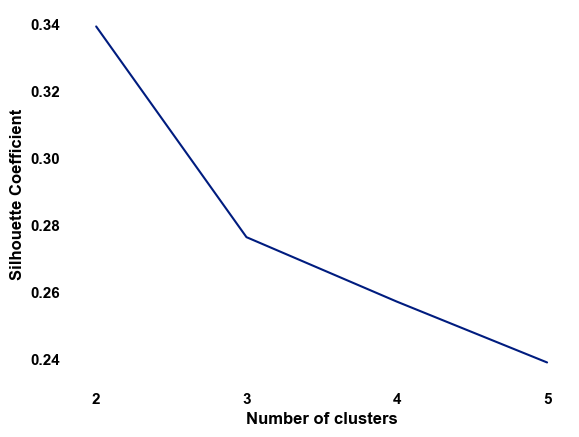

In [17]:
plt.plot(range(2,6),silhouette_coefficients)
plt.xticks(range(2,6))
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()

<span style="color:DodgerBlue;">We can see the highest Silhouette score is near the vale2  The Silhouette score also confirms that the Knee is located near the value 2. 

In [18]:
optimal_k_silhouette = silhouette_coefficients.index(max(silhouette_coefficients)) + 2
print(f"Optimal number of clusters (Silhouette): {optimal_k_silhouette}")

Optimal number of clusters (Silhouette): 2


In [19]:
print(f"Optimal number of clusters (WCSS): {optimal_k_wcss}")
print(f"Optimal number of clusters (Silhouette): {optimal_k_silhouette}")

Optimal number of clusters (WCSS): 2
Optimal number of clusters (Silhouette): 2


<span style="color:DodgerBlue;"> Both WCSS and Silhouette confirms that the possible and meaningful cluster is 2 when we use all relevant features.

#### <span style="color:Khaki;"> Differnciating cluters using PCA and visualizing via Scatter plot:

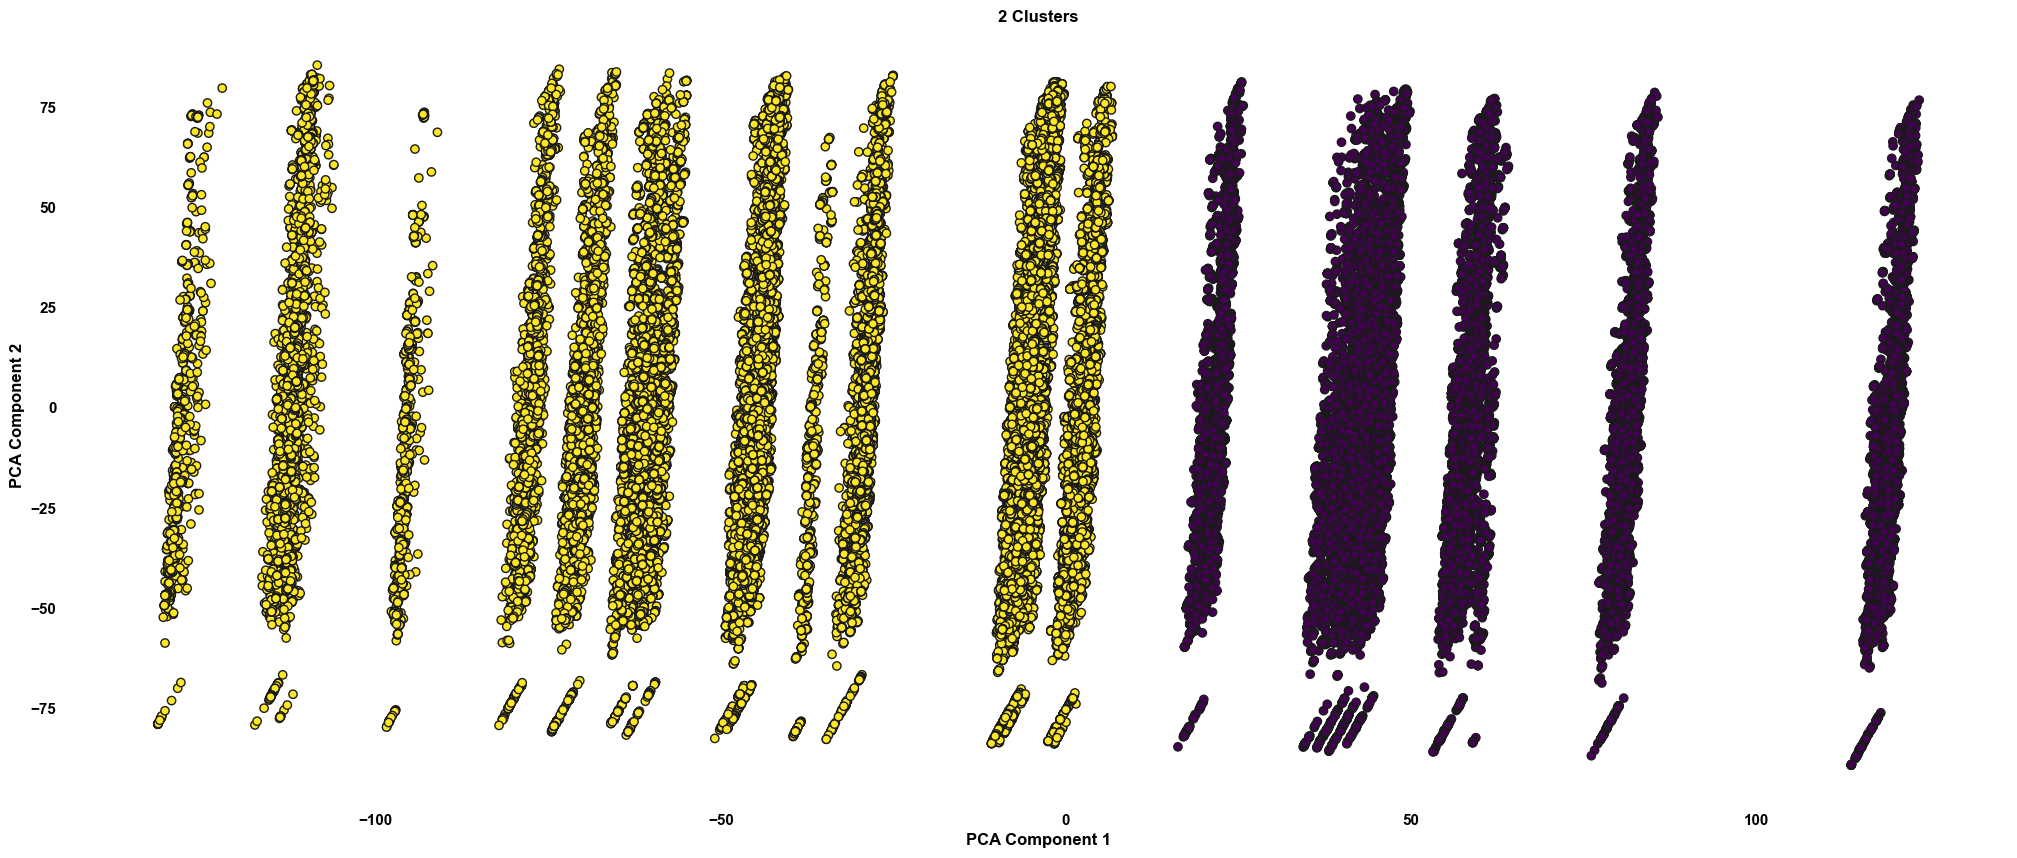

In [14]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Assuming x_train_scaled_df is your original dataset

# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
x_pca = pca.fit_transform(df[all_features])

# Fit KMeans with 2 clusters
kmeans_2 = KMeans(n_clusters=2, init='k-means++')
labels_2 = kmeans_2.fit_predict(df[all_features])

# Plot the clusters
plt.figure(figsize=(25, 10))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=labels_2, cmap='viridis', marker='o', edgecolor='k')
plt.title('2 Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

## <span style="color:Aqua;">Training the model with Original Features:</span>

Removed additional features that we created using original features as a part of Feature engineering.

### <span style="color:Khaki;">Finding K value using Elbow method:

In [15]:
wcss = []

for k in range(1,6):
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(df[original_features])
    wcss.append(kmeans.inertia_)

print(wcss)

[33650194.30739252, 17251285.254171096, 11988582.135122791, 10707863.507859327, 9905866.348959863]


#### <span style="color:Khaki;">Plotting wcss values to find the Elbow:

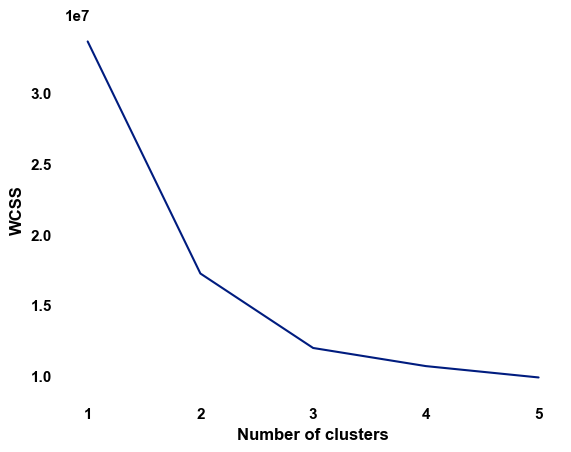

In [16]:
plt.plot(range(1,6),wcss)
plt.xticks(range(1,6))
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### <span style="color:Khaki;">Finding knee locator in the Elbow curve:

In [17]:
kl = KneeLocator(range(1,6),wcss,curve='convex',direction="decreasing")
optimal_k_wcss = kl.elbow
optimal_k_wcss

2

### <span style="color:Khaki;">Finding K value using silhouette score method:

In [18]:
silhouette_coefficients = []

for k in range(2,6):
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(df[original_features])
    score = silhouette_score(df[original_features],kmeans.labels_)
    silhouette_coefficients.append(score)
print(silhouette_coefficients)

[0.4565896618266585, 0.3193071051441921, 0.2274515922546504, 0.21498708142704723]


<span style="color:DodgerBlue;">THe highest silouette scode is 45.65.

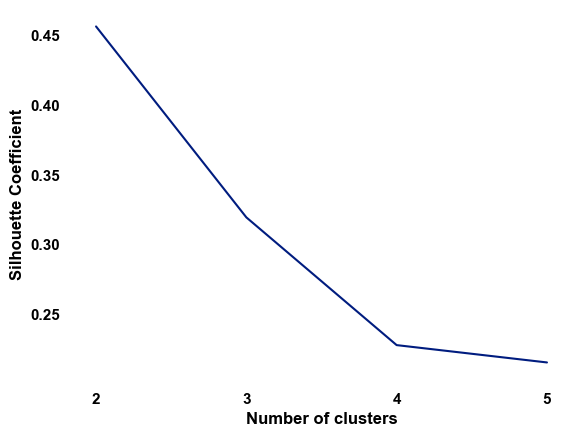

In [19]:
plt.plot(range(2,6),silhouette_coefficients)
plt.xticks(range(2,6))
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()

In [20]:
optimal_k_silhouette = silhouette_coefficients.index(max(silhouette_coefficients)) + 2
print(f"Optimal number of clusters (Silhouette): {optimal_k_silhouette}")

Optimal number of clusters (Silhouette): 2


In [21]:
print(f"Optimal number of clusters (WCSS): {optimal_k_wcss}")
print(f"Optimal number of clusters (Silhouette): {optimal_k_silhouette}")

Optimal number of clusters (WCSS): 2
Optimal number of clusters (Silhouette): 2


<span style="color:DodgerBlue;"> Both WCSS and Silhouette confirms that the possible and meaningful cluster is 2 when we use all original Features.

#### <span style="color:Khaki;"> Differnciating cluters using PCA and visualizing via Scatter plot:

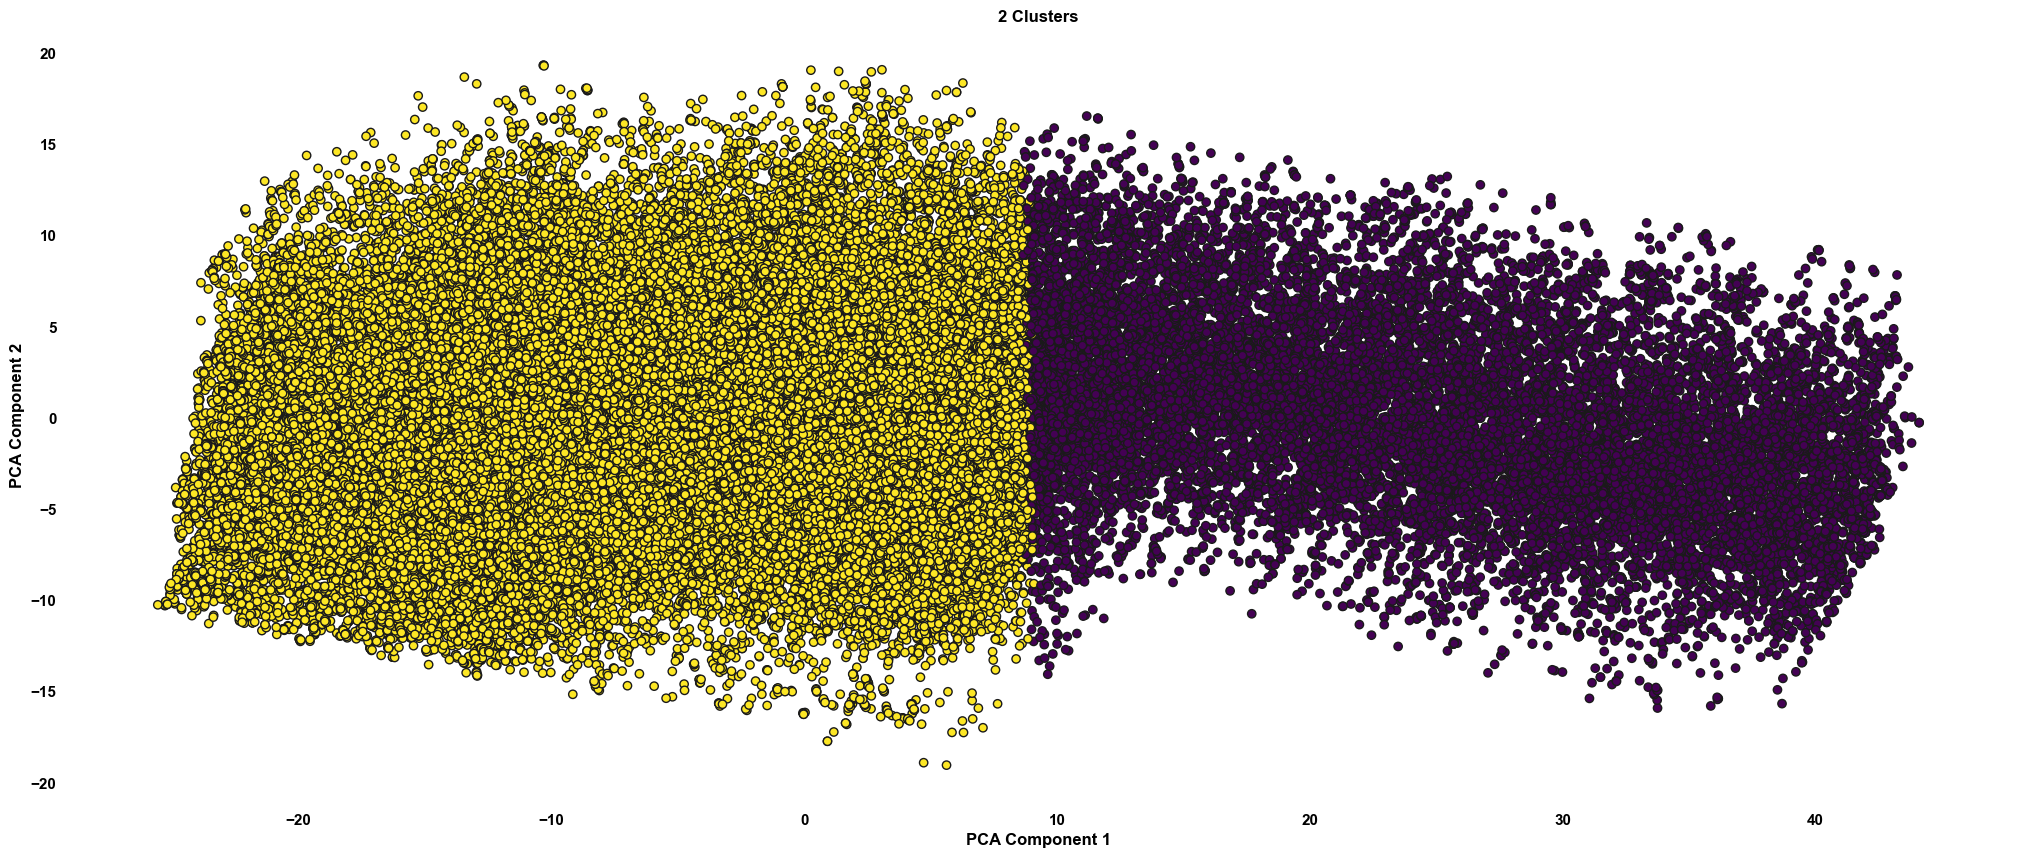

In [22]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Assuming x_train_scaled_df is your original dataset

# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
x_pca = pca.fit_transform(df[original_features])

# Fit KMeans with 2 clusters
kmeans_2 = KMeans(n_clusters=2, init='k-means++')
labels_2 = kmeans_2.fit_predict(df[original_features])

# Plot the clusters
plt.figure(figsize=(25, 10))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=labels_2, cmap='viridis', marker='o', edgecolor='k')
plt.title('2 Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

## <span style="color:Aqua;">Training the model with Revised Features:</span>

We have used Original Features plus additional features which seems more relevant to our problem statement.

### <span style="color:Khaki;">Finding K value using silhouette score method:

In [23]:
wcss = []

for k in range(1,6):
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(df[revised_features])
    wcss.append(kmeans.inertia_)

print(wcss)

[178757262.59328932, 99894162.60411294, 77091712.0253822, 61590335.54582684, 52316073.525904804]


#### <span style="color:Khaki;">Plotting wcss values to find the Elbow:

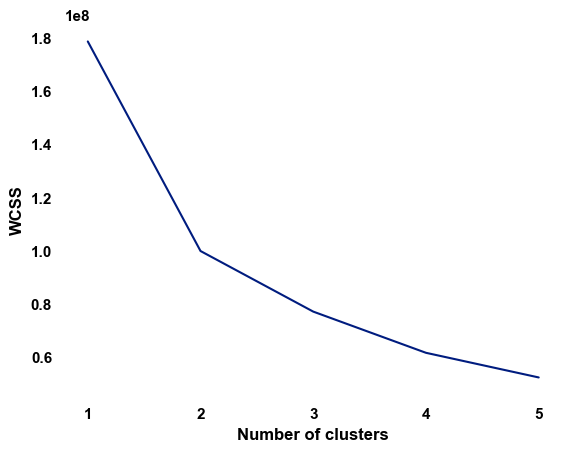

In [24]:
plt.plot(range(1,6),wcss)
plt.xticks(range(1,6))
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### <span style="color:Khaki;">Finding knee locator in the Elbow curve:

In [25]:
kl = KneeLocator(range(1,6),wcss,curve='convex',direction="decreasing")
optimal_k_wcss = kl.elbow
optimal_k_wcss

2

### <span style="color:Khaki;">Finding K value using silhouette score method:

In [26]:
silhouette_coefficients = []

for k in range(2,6):
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(df[revised_features])
    score = silhouette_score(df[revised_features],kmeans.labels_)
    silhouette_coefficients.append(score)
print(silhouette_coefficients)

[0.35948774750266754, 0.28781470614936444, 0.2922667469430079, 0.2823556880199091]


<span style="color:DodgerBlue;">THe highest silouette scode is 35.94.

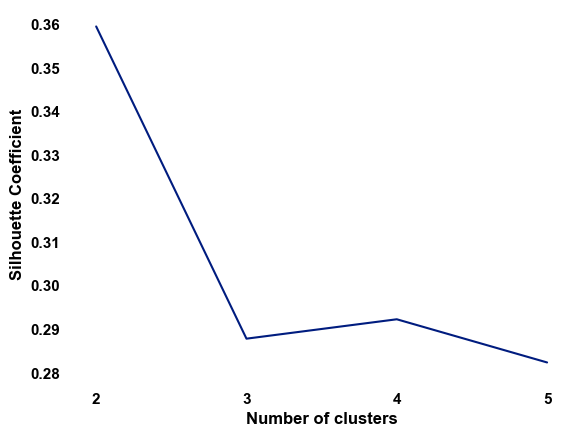

In [27]:
plt.plot(range(2,6),silhouette_coefficients)
plt.xticks(range(2,6))
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()

In [28]:
optimal_k_silhouette = silhouette_coefficients.index(max(silhouette_coefficients)) + 2
print(f"Optimal number of clusters (Silhouette): {optimal_k_silhouette}")

Optimal number of clusters (Silhouette): 2


In [29]:
print(f"Optimal number of clusters (WCSS): {optimal_k_wcss}")
print(f"Optimal number of clusters (Silhouette): {optimal_k_silhouette}")

Optimal number of clusters (WCSS): 2
Optimal number of clusters (Silhouette): 2


<span style="color:DodgerBlue;"> Both WCSS and Silhouette confirms that the possible and meaningful cluster is 2 when we use all original Features.

#### <span style="color:Khaki;"> Differnciating cluters using PCA and visualizing via Scatter plot:

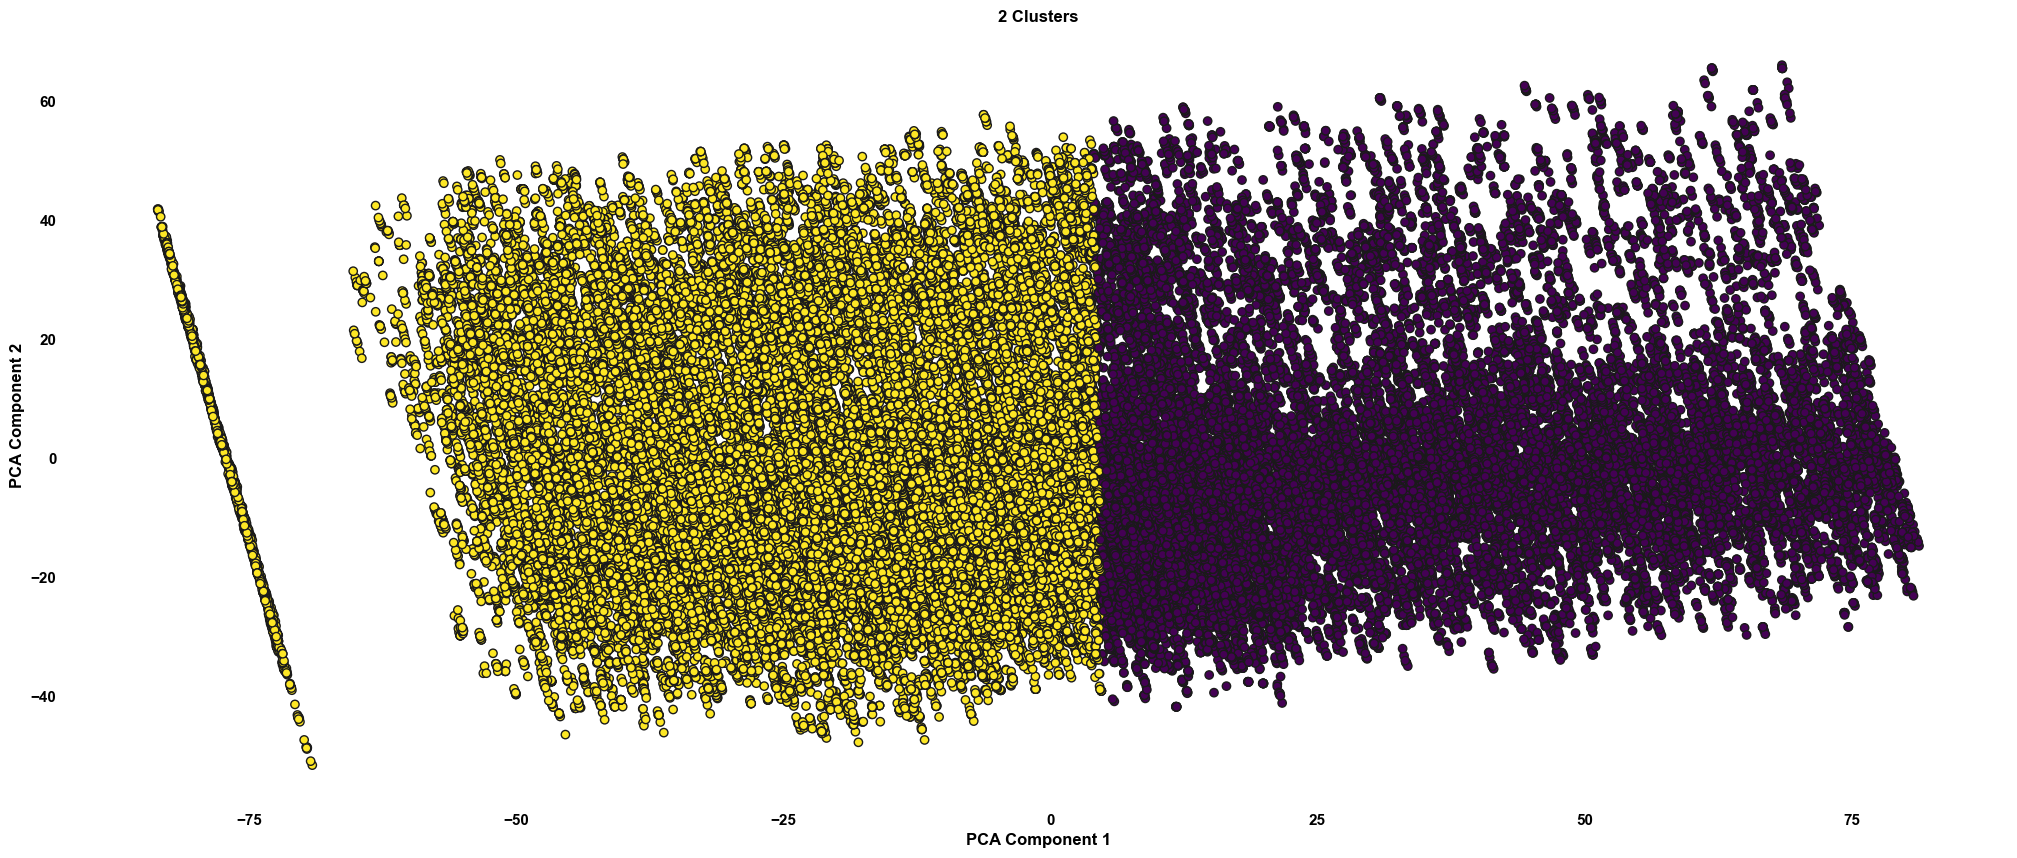

In [30]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Assuming x_train_scaled_df is your original dataset

# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
x_pca = pca.fit_transform(df[revised_features])

# Fit KMeans with 2 clusters
kmeans_2 = KMeans(n_clusters=2, init='k-means++')
labels_2 = kmeans_2.fit_predict(df[revised_features])

# Plot the clusters
plt.figure(figsize=(25, 10))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=labels_2, cmap='viridis', marker='o', edgecolor='k')
plt.title('2 Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

### <span style="color:Tomato;"> From the above we can see the possible and meaningful cluster is two.

# <span style="color:Tomato;">Training the model after scaling the dataset:</span>


#### <span style="color:Khaki;"> Scaling the data:

In [32]:
scales = {'std_scale' : StandardScaler(),
'mm_scale' : MinMaxScaler(feature_range=(0,1)),
'rob_scale' : RobustScaler()
}
scaled_dfs = {}
for scaler_name, scaler in scales.items():
    scaled_dfs[scaler_name] = scaler.fit_transform(df[original_features].values)
    print(scaler_name, '---', len(scaled_dfs[scaler_name]))

for scaler_name, scaled_df in scaled_dfs.items():
    print(scaler_name, scaled_df[:1])

std_scale --- 100000
mm_scale --- 100000
rob_scale --- 100000
std_scale [[-0.91343801 -0.74189873  0.19094616 -1.2213467  -1.01218264 -0.4649276
   1.27417057 -1.26372666  0.40945462  1.64667727 -0.94783536 -0.32206698
  -0.99485115 -0.86396218]]
mm_scale [[0.27272727 0.36363636 0.44444444 0.0483871  0.28       0.23529412
  1.         0.         0.6        1.         0.27002413 0.31664311
  0.31710363 0.2921981 ]]
rob_scale [[-0.5        -0.33333333  0.33333333 -0.83333333 -0.77777778 -0.2
   1.         -1.          0.25        1.         -0.59248145 -0.16514373
  -0.70580554 -0.4958076 ]]


#### <span style="color:Khaki;"> Training the model:

In [39]:
silhouette_avg = {}
calinski_harabasz = {}
davies_bouldin = {}
labels = {}
for scaler_name, scaled_df in scaled_dfs.items():
    kmeans = KMeans(n_clusters=2, random_state=42)
    kmeans.fit(scaled_df)
    labels[scaler_name] = kmeans.labels_
    df[f'Cluster_scaler_name'] = kmeans.predict(scaled_df)
    silhouette_avg[scaler_name] = silhouette_score(scaled_df, kmeans.labels_)
    calinski_harabasz[scaler_name] = calinski_harabasz_score(scaled_df, kmeans.labels_)
    davies_bouldin[scaler_name] = davies_bouldin_score(scaled_df, kmeans.labels_)

In [50]:
print(f"silhouette_avg -- {silhouette_avg}")
print(f"calinski_harabasz -- {calinski_harabasz}")
print(f"davies_bouldin -- {davies_bouldin}")
[f"{scaler_name} -- {np.unique(labels['mm_scale'])}" for scaler_name in labels.keys()]

silhouette_avg -- {'std_scale': 0.24732989440624006, 'mm_scale': 0.3093537044221262, 'rob_scale': 0.27383549570642546}
calinski_harabasz -- {'std_scale': 41468.01202846469, 'mm_scale': 55378.45912822168, 'rob_scale': 45985.21135489542}
davies_bouldin -- {'std_scale': 1.5070092843847485, 'mm_scale': 1.3019844913878125, 'rob_scale': 1.392784935125952}


['std_scale -- [0 1]', 'mm_scale -- [0 1]', 'rob_scale -- [0 1]']

### <span style="color:Tomato;"> The model's clustering quality is good when we use direct dataset rather than scaled data. So we are going to model without scaling the data. Silouette score is good when we use Original features so we will use this for modeling.

## <span style="color:Aqua;">Creating cluster using the Original Features:</span>


In [20]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(df[original_features])
df['Cluster'] = kmeans.predict(df[original_features])
silhouette = silhouette_score(df[original_features], kmeans.labels_)
calinski_harabasz = calinski_harabasz_score(df[original_features], kmeans.labels_)
davies_bouldin = davies_bouldin_score(df[original_features], kmeans.labels_)

In [21]:
print(f"Clusters unique values -- {np.unique(kmeans.labels_)} \nSilhouette Score -- {silhouette} \
      \ncalinski_harabasz Score -- {calinski_harabasz} \ndavies_bouldin -- {davies_bouldin}")

Clusters unique values -- [0 1] 
Silhouette Score -- 0.4600701449114624       
calinski_harabasz Score -- 96981.69896591567 
davies_bouldin -- 0.803277316072049


In [22]:
df.to_feather('clustered.feather')

## <span style="color:Aqua;">Clusters Summary:</span>

In [23]:
df.groupby('Cluster').median()

num_bank_accounts  num_credit_card  num_of_loan  delay_from_due_date  \
Cluster                                                                         
0                   8.0000           7.0000       6.0000              44.0000   
1                   5.0000           5.0000       3.0000              14.0000   

         num_of_delayed_payment  num_credit_inquiries  credit_mix  \
Cluster                                                             
0                       19.0000               10.0000      0.0000   
1                       12.0000                4.0000      1.0000   

         payment_of_min_amount  credit_score  credit_inquiry_per_loan  \
Cluster                                                                 
0                       2.0000        0.0000                   2.0000   
1                       1.0000        1.0000                   2.0000   

         age_group  disposable_income  age_boxcox  annual_income_boxcox  \
Cluster                                                                   
0           2.0000          2149.7801     10.7137               13.3631   
1           2.0000          3237.9942     11.6528               13.9213   

         monthly_inhand_salary_boxcox  interest_rate_boxcox  \
Cluster                                                       
0                             10.9244                7.8331   
1                             11.6465                4.6482   

         outstanding_debt_square  credit_utilization_ratio_log  \
Cluster                                                          
0                        50.7133                        3.4340   
1                        30.3933                        3.4657   

         credit_history_age_boxcox  changed_credit_limit_cube  \
Cluster                                                         
0                          76.1396                     0.0000   
1                         136.8493                     0.0000   

         total_emi_per_month_square  amount_invested_monthly_boxcox  \
Cluster                                                               
0                            9.7011                          6.9271   
1                            7.7445                          7.7290   

         monthly_balance_boxcox  credit_limit_change_rate_exp  \
Cluster                                                         
0                       18.9880                        0.6242   
1                       21.0596                        0.5039   

         debt_income_ratio_log  loan_income_ratio_month_boxcox  \
Cluster                                                          
0                       7.5513                          1.7392   
1                       8.5039                          1.9279   

         credit_utilization_per_account_boxcox  reliable_payment_boxcox  \
Cluster                                                                   
0                                       0.8127                   3.6831   
1                                       0.9601                   1.8177   

         delayed_payment_ratio_boxcox  investment_to_income_ratio_square  \
Cluster                                                                    
0                              1.1639                             0.1222   
1                              1.3010                             0.1140   

         total_credit_exposure_boxcox  \
Cluster                                 
0                             33.4457   
1                             23.6943   

         credit_utilization_to_income_ratio_boxcox  savings_rate_rec  \
Cluster                                                                
0                                          -8.8709           62.8967   
1                                          -9.5891           75.7339   

         income_stability_boxcox  total_liability_boxcox  debt_paytime_log  \
Cluster                                                                      
0      

Credit_Mix_map = { 'Poor': 0,'Bad':0, 'Standard':1, 'Good': 2  }
Payment_of_Min_Amount_map = { 'No':0, 'Nm':1, 'Yes':2 }
Payment_Behaviour_map = { 'Low_Spent_Small_Value_Payments': 0 , 'Low_Spent_Medium_Value_Payments':1, 'Low_Spent_Large_Value_Payments':2,
                         'High_Spent_Small_Value_Payments':3, 'High_Spent_Medium_Value_Payments':4, 'High_Spent_Large_Value_Payments':5
                        }
age_group_map = {'<18': 0, '18-25': 1, '26-35': 2, '36-50': 3, '50+': 4,}

## <span style="color:Khaki;">Clusters Overview:</span>

<table border="3" style="width:100%; border-collapse: collapse;">
    <tr>
        <th style="background-color:Maroon; color:white; font-size:130%; text-align:center;"><b>Cluster 0 (Lower Risk / Better Financial Health)</b></th>
        <th style="background-color:Maroon; color:white; font-size:130%; text-align:center;"><b>Cluster 1 (Higher Risk / Poorer Financial Health)</b></th>
    </tr>
    <tr>
        <td style="width:50%;">
        <span style="color:Khaki;font-size:110%;"><b>Credit Behavior:</b> </span>
            <ol style="border-bottom: 1px solid #ddd; padding-bottom: 10px;">
                <li>Lower number of bank accounts (5) and credit cards (5)</li>
                <li>Fewer loans (3) and credit inquiries (4)</li>
                <li>Better credit mix (1 = Standard) and credit score (1 = Good)</li>
                <li>Lower delay from due date (14 days) and fewer delayed payments (12)</li>
            </ol>
            <span style="color:Khaki;font-size:110%;"><b>Income and Spending:</b></span>
            <ol style="border-bottom: 1px solid #ddd; padding-bottom: 10px;">
                <li>Higher disposable income (3240.178)</li>
                <li>Higher annual income (13.9232 boxcox transformed)</li>
                <li>Higher monthly inhand salary (11.6471 boxcox transformed)</li>
                <li>Lower outstanding debt (30.3891 squared)</li>
            </ol>
            <span style="color:Khaki;font-size:110%;"><b>Financial Management:</b></span>
            <ol style="border-bottom: 1px solid #ddd; padding-bottom: 10px;">
                <li>Higher savings rate (75.7477)</li>
                <li>Lower debt-to-income ratio (8.5042 log transformed)</li>
                <li>Better payment behavior (2 = Low Spent Large Value Payments)</li>
                <li>More likely to pay minimum amount (1 = Sometimes)</li>
            </ol>
        </td>
        <td style="width:50%;">
        <span style="color:Khaki;font-size:110%;"><b>Credit Behavior:</b></span>
            <ol style="border-bottom: 1px solid #ddd; padding-bottom: 10px;">
                <li>Higher number of bank accounts (8) and credit cards (7)</li>
                <li>More loans (6) and credit inquiries (10)</li>
                <li>Poorer credit mix (0 = Poor/Bad) and credit score (0 = Poor)</li>
                <li>Higher delay from due date (44 days) and more delayed payments (19)</li>
            </ol style="border-bottom: 1px solid #ddd; padding-bottom: 10px;">
            <span style="color:Khaki;font-size:110%;"><b>Income and Spending:</b></span>
            <ol style="border-bottom: 1px solid #ddd; padding-bottom: 10px;">
                <li>Lower disposable income (2148.579)</li>
                <li>Lower annual income (13.3624 boxcox transformed)</li>
                <li>Lower monthly inhand salary (10.9237 boxcox transformed)</li>
                <li>Higher outstanding debt (50.7106 squared)</li>
            </ol style="border-bottom: 1px solid #ddd; padding-bottom: 10px;">
            <span style="color:Khaki;font-size:110%;"><b>Financial Management:</b></span>
            <ol style="border-bottom: 1px solid #ddd; padding-bottom: 10px;">
                <li>Lower savings rate (62.8947)</li>
                <li>Higher debt-to-income ratio (7.5518 log transformed)</li>
                <li>Poorer payment behavior (2 = Low Spent Large Value Payments, but with higher risk indicators)</li>
                <li>More likely to not pay minimum amount (2 = Yes, but with higher risk context)</li>
            </ol>
        </td>
    </tr>
</table>

## <span style="color:Khaki;">Key Insights:</span>
<span style="color: Chartreuse;font-size:120%;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Risk Segmentation: </span>The clustering has effectively separated customers into lower-risk (Cluster 0) and higher-risk (Cluster 1) groups.

<span style="color: Chartreuse;font-size:120%;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Credit Utilization: </span>Cluster 1 customers have more credit products but poorer credit scores, suggesting overextension of credit.

<span style="color: Chartreuse;font-size:120%;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Payment Behavior: </span> Cluster 0 customers are more punctual with payments and have fewer delays.

<span style="color: Chartreuse;font-size:120%;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Income vs. Debt: </span> Despite lower incomes, Cluster 1 customers have higher outstanding debt, indicating potential financial stress.

<span style="color: Chartreuse;font-size:120%;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Financial Management: </span> Cluster 0 customers show better financial management with higher savings rates and lower debt-to-income ratios.

<span style="color: Chartreuse;font-size:120%;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Credit Inquiries: </span> The higher number of credit inquiries in Cluster 1 might indicate these customers are seeking more credit, possibly due to financial difficulties.

<span style="color: white;font-size:105%;"> These insights can be used to tailor financial products, adjust risk assessments, and develop targeted financial education or assistance programs for each cluster. The clear separation between clusters suggests that this segmentation could be valuable for strategic decision-making in customer relationship management and risk mitigation. </span>

# <span style="color:Aqua;">Training DB Scan model:</span>


In [22]:
min_samples_range = range(2, 5)
list(min_samples_range)

[2, 3, 4]

In [23]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

def dbscan_grid_search(X, eps_range, min_samples_range):
    best_score = -1
    best_params = {}
    
    for eps in eps_range:
        for min_samples in min_samples_range:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(X)
            
            # Skip if all points are noise (-1)
            if len(set(labels)) < 2:
                continue
            
            score = silhouette_score(X, labels)
            
            if score > best_score:
                best_score = score
                best_params = {'eps': eps, 'min_samples': min_samples}
    
    return best_params, best_score

# Define ranges to search
eps_range = np.arange(0.1, 2.0, 0.3)
min_samples_range = range(2, 5)

best_params, best_score = dbscan_grid_search(df[original_features], eps_range, min_samples_range)
print(f"Best parameters: {best_params}")
print(f"Best silhouette score: {best_score}")

Best parameters: {'eps': 1.9000000000000004, 'min_samples': 2}
Best silhouette score: -0.004675561463720598


In [27]:
df[original_features].shape

(100000, 14)

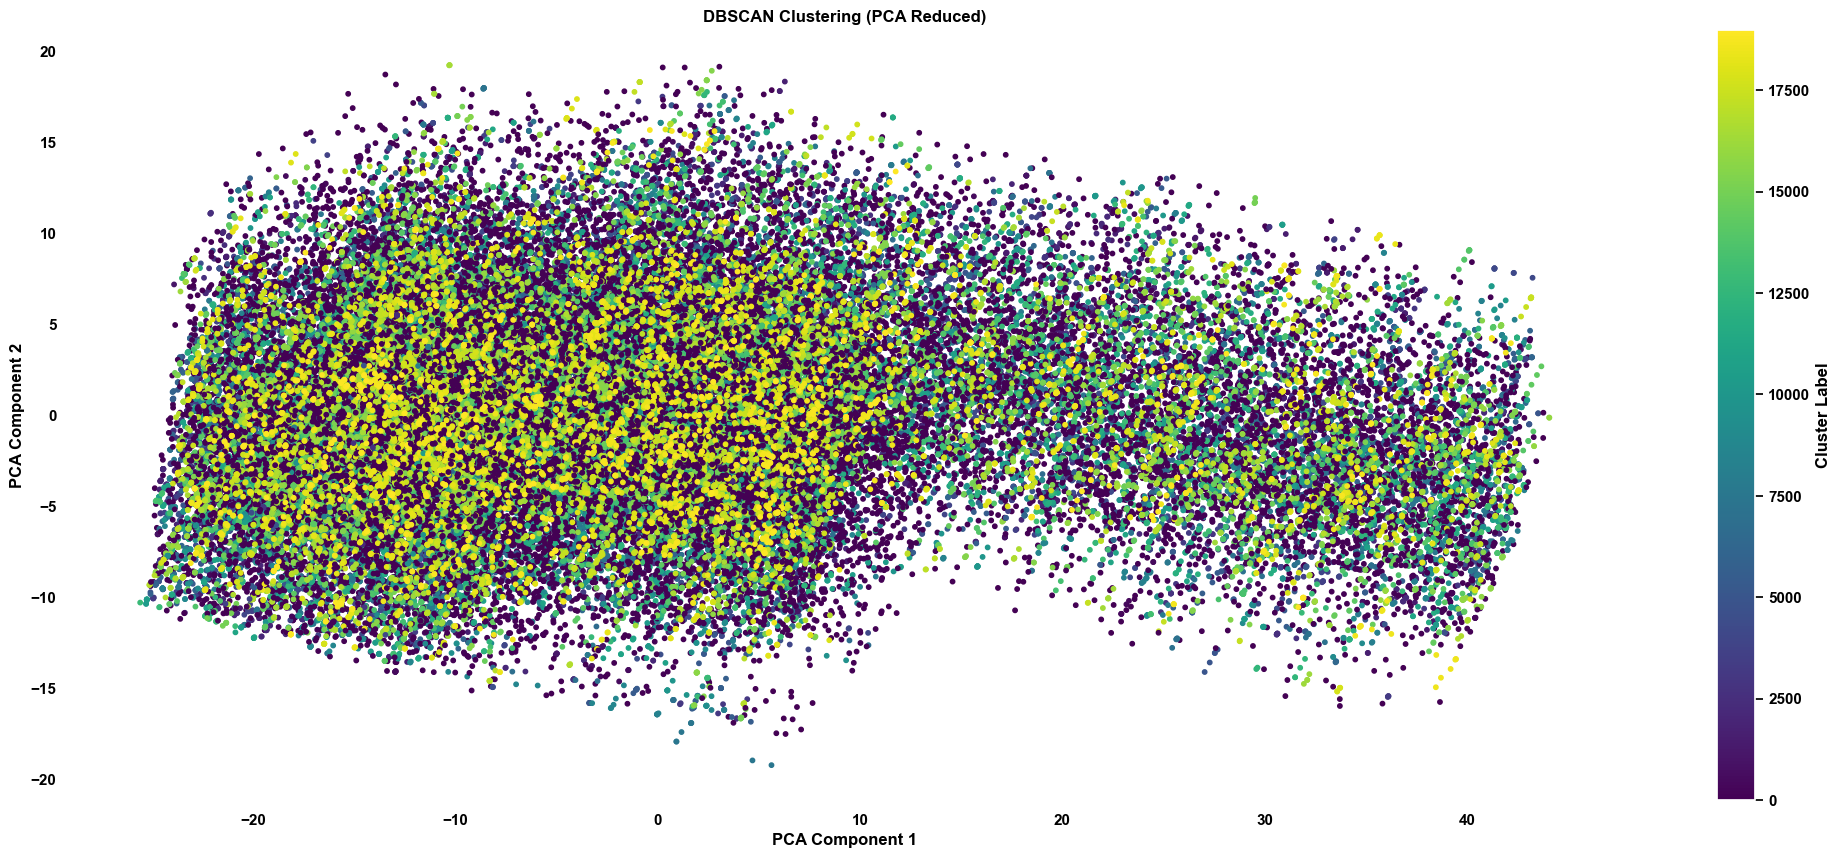

In [25]:
from sklearn.decomposition import PCA

dbscan = DBSCAN(eps=3, min_samples=3)
labels = dbscan.fit_predict(df[original_features])

pca = PCA(n_components=2)
pca_components = pca.fit_transform(df[original_features])

# Fit DBSCAN
dbscan = DBSCAN(eps=1.9000000000000004,min_samples=2)
labels = dbscan.fit_predict(df[original_features])

# Plot the clusters
plt.figure(figsize=(25, 10))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=labels, cmap='viridis', s=10)
plt.title('DBSCAN Clustering (PCA Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

In [44]:
df['Cluster_db'] = dbscan.fit_predict(df)

In [45]:
df.Cluster_db.value_counts()

Cluster_db
-1       82245
 6872        8
 172         8
 877         7
 4127        7
         ...  
 2867        2
 2865        2
 2864        2
 2861        2
 7582        2
Name: count, Length: 7584, dtype: int64

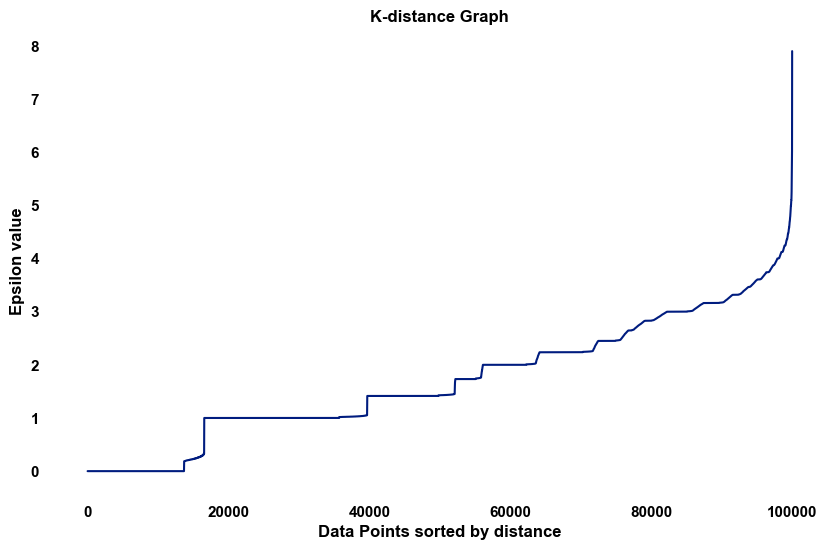

In [34]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Fit NearestNeighbors model
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(df[original_features])
distances, indices = neighbors_fit.kneighbors(df[original_features])

# Sort the distances and plot
distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Epsilon value')
plt.title('K-distance Graph')
plt.show()